# 1.0 - IMPORTING , LOADING AND HELP FUNCTIONS

## 1.0.1 - Importing packages and modules for project

In [152]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
from PIL import Image
from matplotlib import rcParams
from scipy import stats  as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

## 1.0.2 - Loading Dataframe

In [2]:
df1 = pd.read_csv('cardio_train.csv', delimiter=';')

## 1.0.3 - Help Functions

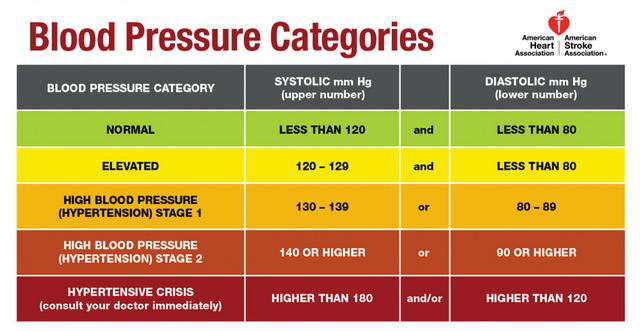

In [3]:
image = Image.open('blood.jpg')
image

In [4]:
# BLOOD PRESSURE
def categorize_blood_pressure(x):
  if x['ap_hi'] < 120 and x['ap_lo'] < 80:
    return "Normal"
  elif 120 <= x['ap_hi'] <= 129 and x['ap_lo'] < 80:
    return "Elevated"
  elif 130 <= x['ap_hi'] <= 139 or 80 <= x['ap_lo'] <= 89:
    return "High Blood Pressure(Stage 1)"
  elif  140 <= x['ap_hi'] <= 180 or 90 <= x['ap_lo'] <= 120:
    return "High Blood Pressure(Stage 2)"
  elif  (x['ap_hi'] > 180 and  x['ap_lo'] > 120) or (x['ap_hi'] > 180 or x['ap_lo'] > 120):
    return "Hypertensive Crisis"

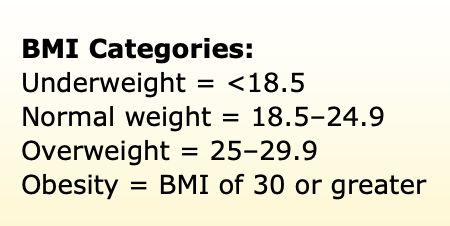

In [5]:
image = Image.open('BMI.png')
image

In [6]:
# BMI

def mass(x):
    if x['bmi'] < 18.5:
        return 'Underweight'
    elif x['bmi'] > 18.5 and x['bmi'] <= 24.9:
        return 'Normal weight'
    elif x['bmi'] > 25 and x['bmi'] <= 29.9:
        return 'Overweight'
    elif x['bmi'] > 30:
        return 'Obesity'

In [7]:
# CRAMER V
def cramer_v(x,y):
    
    cm = pd.crosstab( x, y )
    
    chi2 = ss.chi2_contingency(cm)[0]

    n = cm.sum().sum()
    
    phi2 = chi2/n
    
    r,k = cm.shape
    
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    
    rcorr = r - ((r-1)**2)/(n-1)
    
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

# 2.0 - DATA DESCRIPTION

In [8]:
df2 = df1.copy()

## 2.0.1 - Descriptive Statistics - Knowing the Data

### 2.0.1.1 - General Description

In [9]:
df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 2.0.1.2 - Numerical Features Description

In [11]:
basic_describe = df1[['age','height', 'weight', 'ap_hi', 'ap_lo']].describe().T 

In [12]:
aditional_describe = {'Skew': df1[['age','height','weight','ap_lo','ap_hi']].skew(),
                      'Kurtosis': df1[['age','height','weight','ap_lo','ap_hi']].kurtosis(),
                      'Amplitude/Range': df1[['age','height','weight','ap_lo','ap_hi']].apply(lambda x : x.max() - x.min()),
                      'Median': df1[['age','height','weight','ap_lo','ap_hi']].median()}

mode = df1[['age','height','weight','ap_lo','ap_hi']].mode().T
mode = mode.rename(columns={0:'Mode'})

aditional_describe_table = pd.DataFrame(aditional_describe, columns=['Skew','Kurtosis','Amplitude/Range','Median'])

describe_table = aditional_describe_table.merge(mode,left_index=True, right_index=True)
describe_table = describe_table.merge(basic_describe, left_index=True, right_index=True)

In [13]:
describe_table

,Skew,Kurtosis,Amplitude/Range,Median,Mode,1,count,mean,std,min,25%,50%,75%,max
age,-0.307055,-0.823447,12915.0,19703.0,18236.0,19741.0,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
height,-0.642187,7.943653,195.0,165.0,165.0,NaN,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,1.012070,2.586825,190.0,72.0,65.0,NaN,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_lo,32.114083,1425.914585,11070.0,80.0,80.0,NaN,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
ap_hi,85.296214,7580.074738,16170.0,120.0,120.0,NaN,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0


**Descriptive Statistical Plots**

HISTOGRAMS (Skewness, Kurtosis)

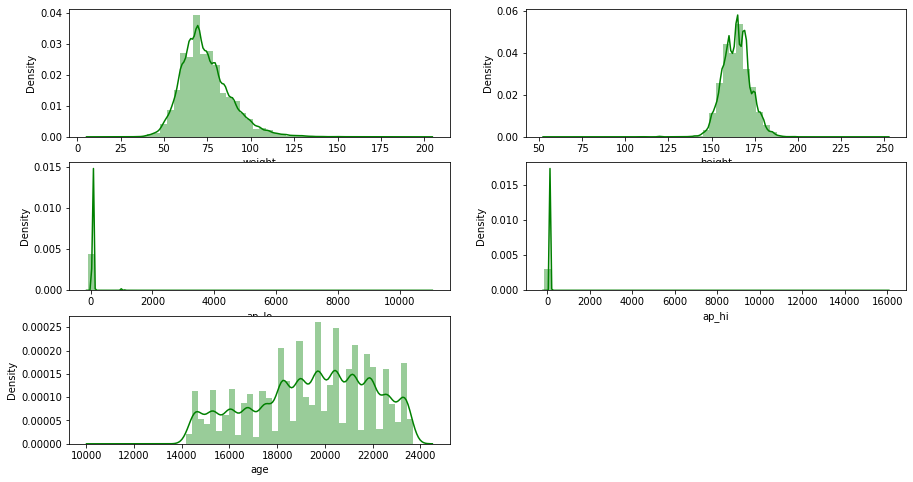

In [14]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(3,2,1)
sb.distplot(df2.weight, color='g')

plt.subplot(3,2,2)
sb.distplot(df2.height, color='g')

plt.subplot(3,2,3)
sb.distplot(df2.ap_lo, color='g')

plt.subplot(3,2,4)
sb.distplot(df2.ap_hi, color='g')

plt.subplot(3,2,5)
sb.distplot(df2.age, color ='g')

plt.show()

BOXPLOTS (Outliers)

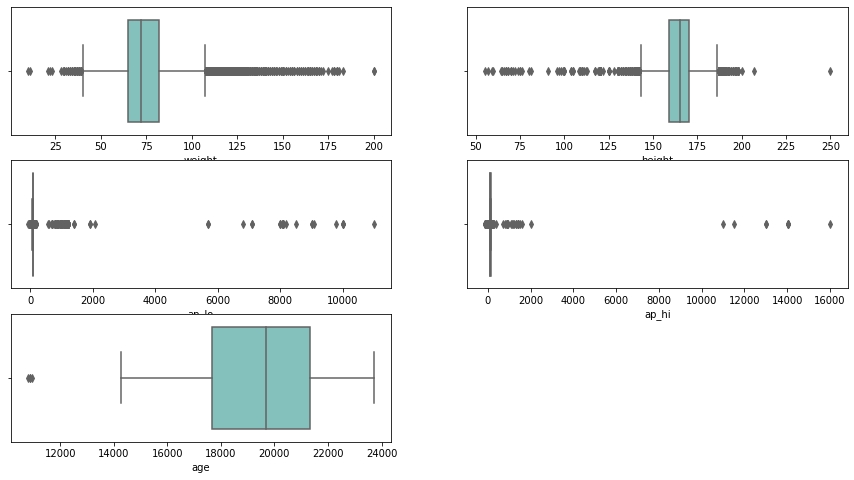

In [15]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(3,2,1)
sb.boxplot(df2.weight, palette="GnBu")

plt.subplot(3,2,2)
sb.boxplot(df2.height, palette="GnBu")

plt.subplot(3,2,3)
sb.boxplot(df2.ap_lo, palette="GnBu")

plt.subplot(3,2,4)
sb.boxplot(df2.ap_hi, palette="GnBu")

plt.subplot(3,2,5)
sb.boxplot(df2.age, palette="GnBu") 

plt.show()

**Resume of numerical features analysis:**

1 - Note that the mode, average and median measures are very close to their values, this indicates that the variables are close to a normal distribution.

2 - There is a problem with the features ap_lo and ap_hi when observing kurtose, skewness, amplitude, min and max values, and std, as they are values that are very out of normal. **This can indicate bad values in these variables.**

3 - In the weight and height features, abnormal kurtosis and skewness measurements are also observed. **It can also indicate bad values.**

4 - In all variables a **high volume of Outliers** was observed. Depending on the model to be used, we may have problems.

### 2.0.1.3 - Categorical Features Description

**Table Frequency**

**- age feature**

In [16]:
df2['age_year'] = df2['age'].apply(lambda x : x // 365)

age = {'Age': df2['age_year'].unique(),
       'Frequency': df2['age_year'].value_counts(),
       'Relative_Frequency': round(df2['age_year'].value_counts() / df2['age_year'].value_counts().sum() * 100,2),}


age_frequency_table = pd.DataFrame(age, columns=['Age','Frequency','Relative_Frequency'])

age_frequency_table

,Age,Frequency,Relative_Frequency
55,50,3927,5.61
53,55,3868,5.53
57,51,3686,5.27
56,48,3607,5.15
54,47,3605,5.15
59,60,3576,5.11
49,61,3417,4.88
58,54,3409,4.87
51,40,3368,4.81
52,39,3279,4.68


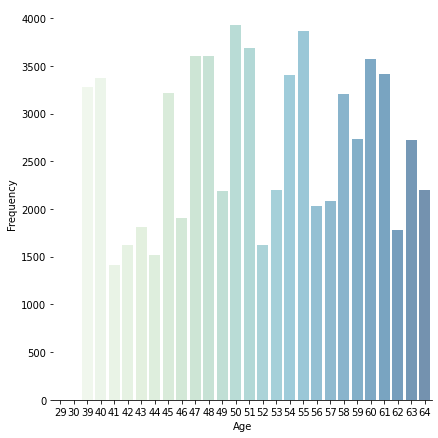

In [17]:
g = sb.catplot(
    data=df2, kind="bar",
    x=df2.age_year.unique(), y=df2.age_year.value_counts(), palette="GnBu", alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Age', "Frequency");

**- gender feature** (1 = Women . 2 = Men)

In [18]:
gender = {'Gender': df2['gender'].unique(),
          'Frequency': df2['gender'].value_counts(),
          'Relative_Frequency': round(df2['gender'].value_counts() / df2['gender'].value_counts().sum() * 100,2),}


gender_frequency_table = pd.DataFrame(gender, columns=['Gender','Frequency','Relative_Frequency'])

gender_frequency_table

,Gender,Frequency,Relative_Frequency
1,2,45530,65.04
2,1,24470,34.96


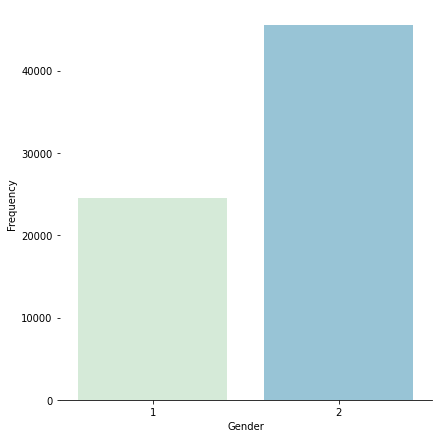

In [19]:
g = sb.catplot(data=df2, kind='bar', x=df2.gender.unique(), y=df2.gender.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Gender','Frequency');

**- cholesterol feature** (1 = normal, 2 = above normal, 3 = well above normal)

In [20]:
cholesterol = {'Cholesterol': df2['cholesterol'].unique(),
               'Frequency': df2['cholesterol'].value_counts(),
               'Relative_Frequency': round(df2['cholesterol'].value_counts() / df2['cholesterol'].value_counts().sum() * 100,2),}


cholesterol_frequency_table = pd.DataFrame(cholesterol, columns=['Cholesterol','Frequency','Relative_Frequency'])

cholesterol_frequency_table

,Cholesterol,Frequency,Relative_Frequency
1,1,52385,74.84
2,3,9549,13.64
3,2,8066,11.52


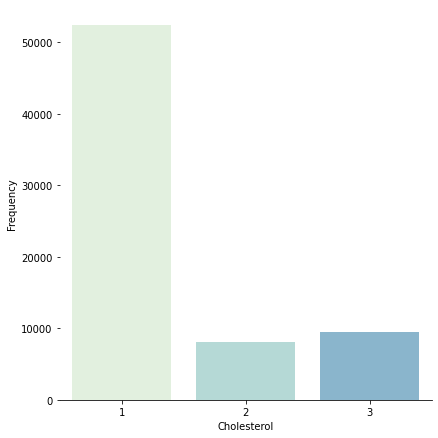

In [21]:
g = sb.catplot(data=df2, kind='bar', x=df2.cholesterol.unique(), y=df2.cholesterol.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Cholesterol','Frequency');

**- gluc feature** (1 = normal, 2 = above normal, 3 = well above normal)

In [22]:
gluc = {'Glucose': df2['gluc'].unique(),
               'Frequency': df2['gluc'].value_counts(),
               'Relative_Frequency': round(df2['gluc'].value_counts() / df2['gluc'].value_counts().sum() * 100,2),}


gluc_frequency_table = pd.DataFrame(gluc, columns=['Glucose','Frequency','Relative_Frequency'])

gluc_frequency_table

,Glucose,Frequency,Relative_Frequency
1,1,59479,84.97
3,2,5331,7.62
2,3,5190,7.41


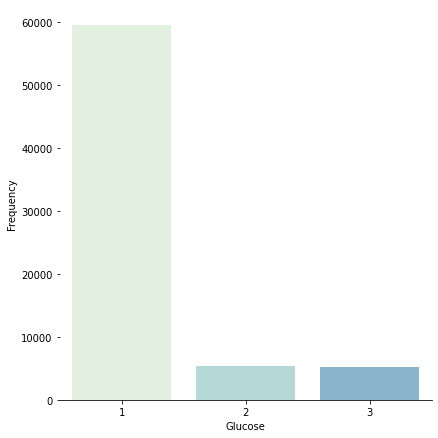

In [23]:
g = sb.catplot(data=df2, kind='bar', x=df2.gluc.unique(), y=df2.gluc.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Glucose','Frequency');

**- smoke feature** (0 = no smoke, 1 = smoke)

In [24]:
smoke = {'Smoke': df2['smoke'].unique(),
               'Frequency': df2['smoke'].value_counts(),
               'Relative_Frequency': round(df2['smoke'].value_counts() / df2['smoke'].value_counts().sum() * 100,2),}


smoke_frequency_table = pd.DataFrame(smoke, columns=['Smoke','Frequency','Relative_Frequency'])

smoke_frequency_table

,Smoke,Frequency,Relative_Frequency
0,0,63831,91.19
1,1,6169,8.81


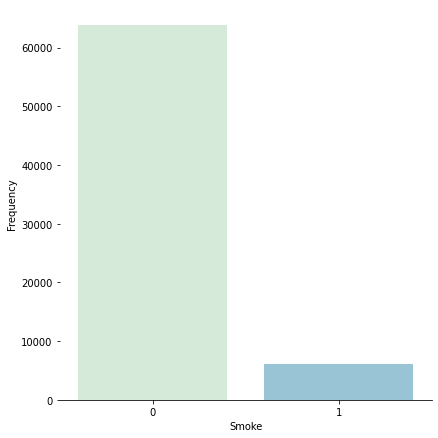

In [25]:
g = sb.catplot(data=df2, kind='bar', x=df2.smoke.unique(), y=df2.smoke.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Smoke','Frequency');

**- alco feature** (0 = no alcohol, 1 = alcohol)

In [26]:
alco = {'Alcohol': df2['alco'].unique(),
               'Frequency': df2['alco'].value_counts(),
               'Relative_Frequency': round(df2['alco'].value_counts() / df2['alco'].value_counts().sum() * 100,2),}


alco_frequency_table = pd.DataFrame(alco, columns=['Alcohol','Frequency','Relative_Frequency'])

alco_frequency_table

,Alcohol,Frequency,Relative_Frequency
0,0,66236,94.62
1,1,3764,5.38


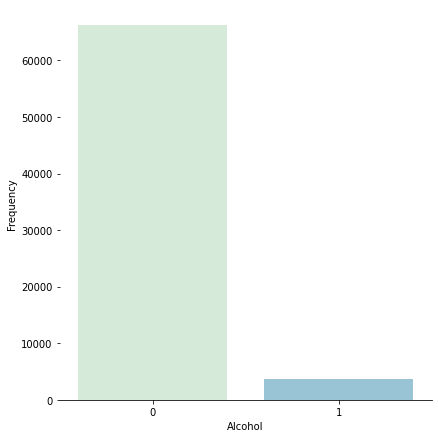

In [27]:
g = sb.catplot(data=df2, kind='bar', x=df2.alco.unique(), y=df2.alco.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Alcohol','Frequency');

**- active feature** (0 = no active, 1 = active)

In [28]:
active = {'Active': df2['active'].unique(),
               'Frequency': df2['active'].value_counts(),
               'Relative_Frequency': round(df2['active'].value_counts() / df2['active'].value_counts().sum() * 100,2),}


active_frequency_table = pd.DataFrame(active, columns=['Active','Frequency','Relative_Frequency'])

active_frequency_table

,Active,Frequency,Relative_Frequency
1,1,56261,80.37
0,0,13739,19.63


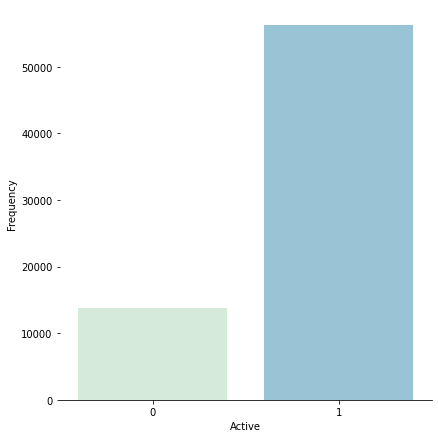

In [29]:
g = sb.catplot(data=df2, kind='bar', x=df2.active.unique(), y=df2.active.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Active','Frequency');

**- cardio feature** (0 = no diesease, 1 = diesease)

In [30]:
cardio = {'Cardio': df2['cardio'].unique(),
               'Frequency': df2['cardio'].value_counts(),
               'Relative_Frequency': round(df2['cardio'].value_counts() / df2['cardio'].value_counts().sum() * 100,2),}


cardio_frequency_table = pd.DataFrame(cardio, columns=['Cardio','Frequency','Relative_Frequency'])

cardio_frequency_table

,Cardio,Frequency,Relative_Frequency
0,0,35021,50.03
1,1,34979,49.97


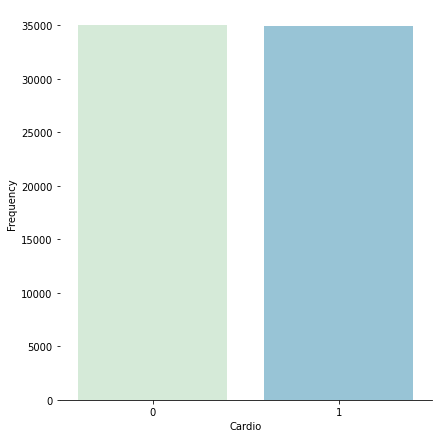

In [31]:
g = sb.catplot(data=df2, kind='bar', x=df2.cardio.unique(), y=df2.cardio.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Cardio','Frequency');

**Resume of categorical features analysis:**

1 - **cardio** feature:
    - This is the TARGET feature. It's not need to be balanced with SMOTE or NearMiss techniques.

2 -  **active, alco, smoke, gender** features:
    - All are subjective features, there is no predefined label classes.
    - I am assuming the values: 0 = no active, 1 = active
                                0 = no alcohol, 1 = alcohol
                                0 = no smoke, 1 = smoke
                                1 = Women . 2 = Men
    
3 - **gluco,cholesterol** features:
    - Based on laboratory medical examinations.
    - According to [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset), the classes were defined as: 1 =  normal, 2 = above normal, 3 = well above normal

4 - **gender** feature:
    - There is no predefined label classes.
    - I am assuming the values: 

5 - **age** feature:
    - Describes ages in days. 
    - Must be changed for years

## 2.0.2 - Hypothesis Mind Map

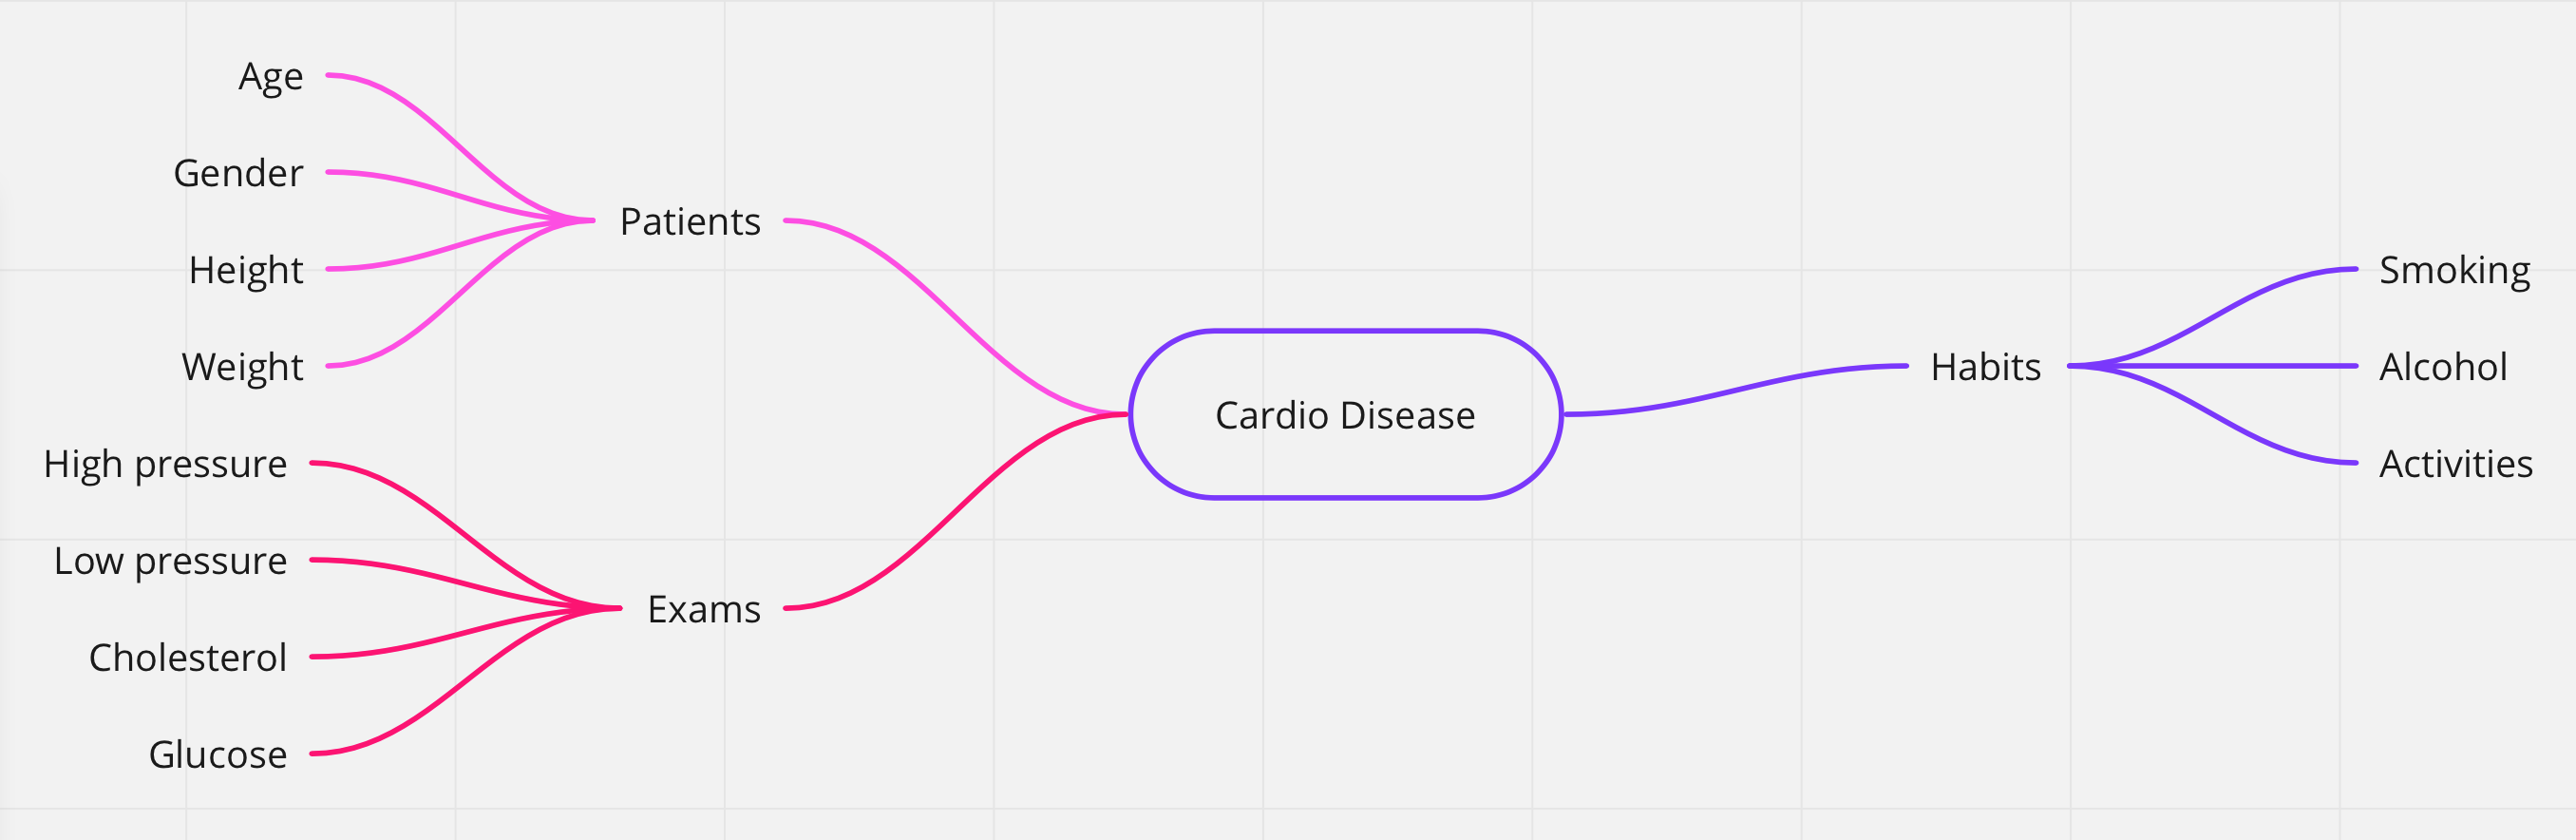

In [32]:
image = Image.open('mindmap.png')
image

## 2.0.3 - Creation of Hypotheses

#### 2.0.1.5.1 - Patients Hypotheses

1 - Do men have more heart diseases than women?

2 - Do older patients have heart disease?

3 - Do patients with more weight have heart disease?

4 - Does height not influence the development of heart disease?

#### 2.0.1.5.2 - Exams Hypotheses

1 - High cholesterol patients are more likely to have heart disease?

2 - Does blood pressure increase the risk of heart disease?

3 - Low blood pressure at high risk of heart disease?

4 - Does the rate of glucose in the blood increase the risk of heart disease?

#### 2.0.1.5.3 - Habits Hypotheses

1 - Smokers have more heart disease?

2 - Who practices physical activities do not develop heart disease?

3 - Does drinking alcohol increase the chances of heart disease?

# 3.0 - FEATURE ENGINEER

In [33]:
df3 = df2.copy()

## 3.0.1 - Feature Transformation

**- Removing id column**

In [34]:
df3 = df3.drop(columns='id')

**- Changing age (in days) column to age (in year) column**

In [35]:
df3['age'] = df3['age'].apply(lambda x : x // 365)

**- Changing dtype of height feature to float64**

In [36]:
df3['height'] = df3.height.astype('float64') 

**- Removing age_year column**

In [37]:
df3 = df3.drop(columns='age_year')

***- Removing Outliers***

 - age feature

In [38]:
Q1_age = df3.age.quantile(.25)
Q3_age = df3.age.quantile(.75) 

IQR_age = Q3_age - Q1_age

lower_limit_age = Q1_age - 1.5 * IQR_age
upper_limit_age = Q3_age + 1.5 * IQR_age

df3.age[(df3.age < lower_limit_age) | (df3.age > upper_limit_age)] 

df3 = df3[(df3.age > lower_limit_age) & (df3.age < upper_limit_age)]

 - weight feature

In [39]:
Q1_weight = df3.weight.quantile(.25)
Q3_weight = df3.weight.quantile(.75) 

IQR_weight = Q3_weight - Q1_weight

lower_limit_weight = Q1_weight - 1.5 * IQR_weight
upper_limit_weight = Q3_weight + 1.5 * IQR_weight

lower_limit_weight , upper_limit_weight

(39.5, 107.5)

In [40]:
df3.weight[(df3.weight < lower_limit_weight) | (df3.weight > upper_limit_weight)] 

15       112.0
62       115.0
83       110.0
196      108.0
267      115.0
         ...  
69873    108.0
69946    115.0
69947    113.0
69981    110.0
69996    126.0
Name: weight, Length: 1819, dtype: float64

In [41]:
df3 = df3[(df3.weight > lower_limit_weight) & (df3.weight < upper_limit_weight)]

 - height feature

In [42]:
Q1_height = df3.height.quantile(.25)
Q3_height = df3.height.quantile(.75) 

IQR_height = Q3_height - Q1_height

lower_limit_height = Q1_height - 1.5 * IQR_height
upper_limit_height = Q3_height + 1.5 * IQR_height

df3.height[(df3.height < lower_limit_height) | (df3.height > upper_limit_height)]

df3 = df3[(df3.height > lower_limit_height) & (df3.height < upper_limit_height)]

 - ap_lo feature

In [43]:
Q1_ap_lo = df3.ap_lo.quantile(.25)
Q3_ap_lo = df3.ap_lo.quantile(.75) 

IQR_ap_lo = Q3_ap_lo - Q1_ap_lo

lower_limit_ap_lo = Q1_ap_lo - 1.5 * IQR_ap_lo
upper_limit_ap_lo = Q3_ap_lo + 1.5 * IQR_ap_lo

df3.ap_lo[(df3.ap_lo < lower_limit_ap_lo) | (df3.ap_lo > upper_limit_ap_lo)]

df3 = df3[(df3.ap_lo > lower_limit_ap_lo) & (df3.ap_lo < upper_limit_ap_lo)]

 - ap_hi feature

In [44]:
Q1_ap_hi = df3.ap_hi.quantile(.25)
Q3_ap_hi = df3.ap_hi.quantile(.75) 

IQR_ap_hi = Q3_ap_hi - Q1_ap_hi

lower_limit_ap_hi = Q1_ap_hi - 1.5 * IQR_ap_hi
upper_limit_ap_hi = Q3_ap_hi + 1.5 * IQR_ap_hi

df3.ap_hi[(df3.ap_hi < lower_limit_ap_hi) | (df3.ap_hi > upper_limit_ap_hi)]

df3 = df3[(df3.ap_hi > lower_limit_ap_hi) & (df3.ap_hi < upper_limit_ap_hi)]

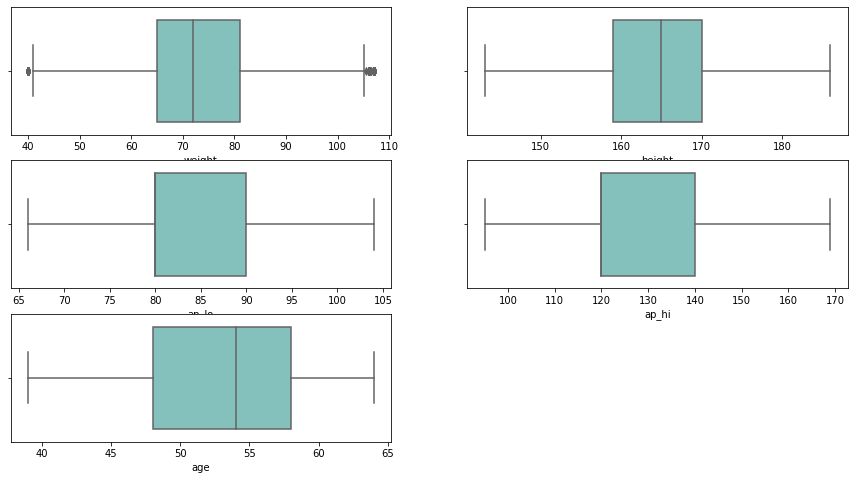

In [45]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(3,2,1)
sb.boxplot(df3.weight, palette="GnBu")

plt.subplot(3,2,2)
sb.boxplot(df3.height, palette="GnBu")

plt.subplot(3,2,3)
sb.boxplot(df3.ap_lo, palette="GnBu")

plt.subplot(3,2,4)
sb.boxplot(df3.ap_hi, palette="GnBu")

plt.subplot(3,2,5)
sb.boxplot(df3.age, palette="GnBu")

plt.show()

Let's try again with the weight variable

In [46]:
Q1_weight = df3.weight.quantile(.25)
Q3_weight = df3.weight.quantile(.75) 

IQR_weight = Q3_weight - Q1_weight

lower_limit_weight = Q1_weight - 1.5 * IQR_weight
upper_limit_weight = Q3_weight + 1.5 * IQR_weight

df3.weight[(df3.weight < lower_limit_weight) | (df3.weight > upper_limit_weight)] 

df3 = df3[(df3.weight > lower_limit_weight) & (df3.weight < upper_limit_weight)]

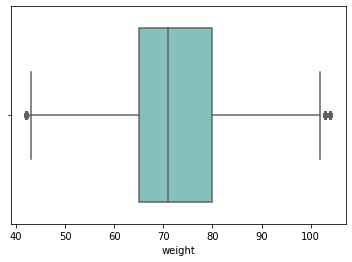

In [47]:
plt.rcParams['figure.figsize'] = (6,4)
sb.boxplot(df3.weight, palette="GnBu");

One again !

In [48]:
Q1_weight = df3.weight.quantile(.25)
Q3_weight = df3.weight.quantile(.75) 

IQR_weight = Q3_weight - Q1_weight

lower_limit_weight = Q1_weight - 1.5 * IQR_weight
upper_limit_weight = Q3_weight + 1.5 * IQR_weight

df3.weight[(df3.weight < lower_limit_weight) | (df3.weight > upper_limit_weight)] 

df3 = df3[(df3.weight > lower_limit_weight) & (df3.weight < upper_limit_weight)]

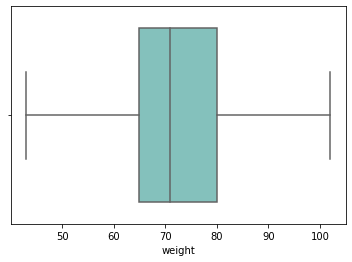

In [49]:
sb.boxplot(df3.weight, palette="GnBu");

**OK ! Finally !!! All of numerical features no have Ouliers anymore**

***- Plotting Histogram***

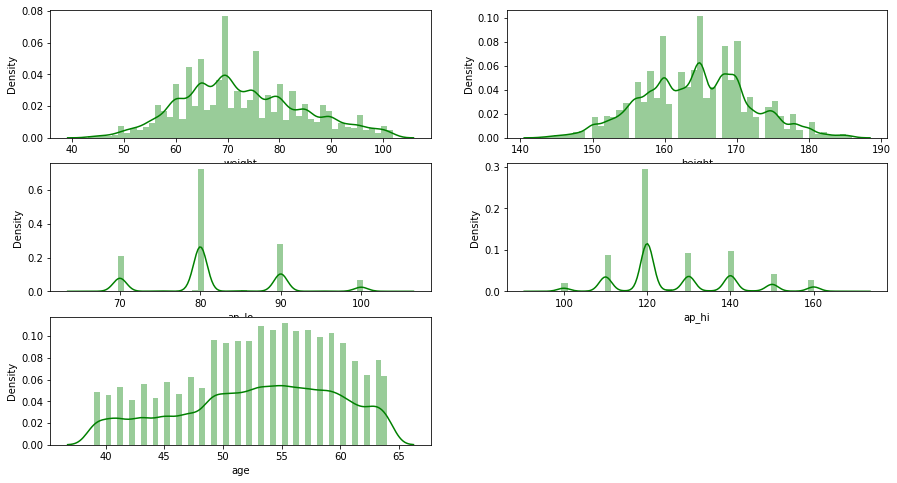

In [50]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(3,2,1)
sb.distplot(df3.weight, color='g')

plt.subplot(3,2,2)
sb.distplot(df3.height, color='g')

plt.subplot(3,2,3)
sb.distplot(df3.ap_lo, color='g')

plt.subplot(3,2,4)
sb.distplot(df3.ap_hi, color='g')

plt.subplot(3,2,5)
sb.distplot(df3.age, color='g')

plt.show()

In [51]:
df3.shape

(60766, 12)

## 3.0.2 - Validating the Hypotheses

**Facilitating the visualization of classes**

In [54]:
aux = df3.copy()

gender_values = {1:'Man', 2:'Woman'}
cholesterol_values = {1:'Normal', 2:'Above Normal', 3: 'Well Above Normal'}
glucose_values = {1:'Normal', 2:'Above Normal', 3:'Well Above Normal'}
smoke_values = {0:'Yes', 1:'No'}
alcohol_values = {0:'No', 1:'Yes'}
active_values = {0:'No', 1:'Yes'}
cardio_values = {0:'No', 1:'Yes'}

aux = aux.replace({'gender': gender_values, 
                   'cholesterol': cholesterol_values,
                   'gluc': glucose_values,
                   'smoke': smoke_values,
                   'alco': alcohol_values,
                   'active': active_values,
                   'cardio': cardio_values})
aux.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Woman,168.0,62.0,110,80,Normal,Normal,Yes,No,Yes,No
1,55,Man,156.0,85.0,140,90,Well Above Normal,Normal,Yes,No,Yes,Yes
2,51,Man,165.0,64.0,130,70,Well Above Normal,Normal,Yes,No,No,Yes
3,48,Woman,169.0,82.0,150,100,Normal,Normal,Yes,No,Yes,Yes
5,60,Man,151.0,67.0,120,80,Above Normal,Above Normal,Yes,No,No,No


### 3.0.2.1 - Bivariate Analysis

#### 3.0.2.1.1 - Patients Hypotheses

1 - Do men have more heart diseases than women?

**TRUE:** Apparently, men suffer more from heart disease than women.

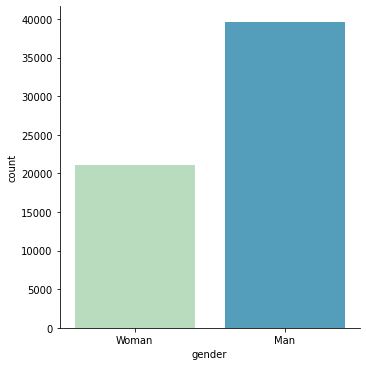

In [55]:
rcParams['figure.figsize'] = 8, 5
sb.catplot(x='gender', kind='count', data = aux, palette="GnBu");

2 - Do older patients have heart disease?

**TRUE:** 
From 55 years of old the patient starts to take risks of acquiring heart diseases.

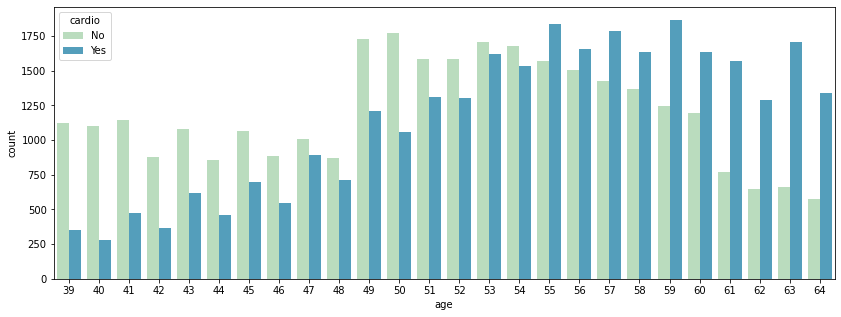

In [56]:
rcParams['figure.figsize'] = 14, 5
sb.countplot(x='age', hue='cardio', data=aux, palette='GnBu');

3 - Do patients with more weight have heart disease?

**FALSE** - Patients weighing between 60 and 80 are more likely to have heart disease

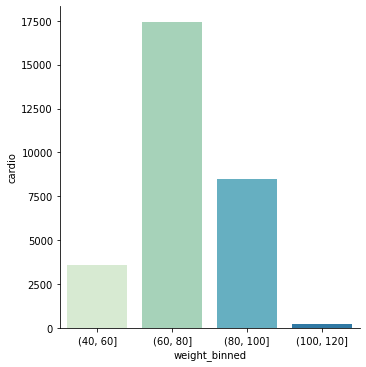

In [57]:
bins = list(np.arange(40,130,20))

aux1 = df3[['weight','cardio']].groupby('weight').sum().reset_index()

aux1['weight_binned'] = pd.cut(aux1['weight'], bins=bins)

aux1 = aux1[['weight_binned','cardio']].groupby('weight_binned').sum().reset_index()
rcParams['figure.figsize'] = 14, 5
sb.catplot(x='weight_binned', y='cardio', data=aux1, palette='GnBu', kind='bar');

4 - Does height not influence the development of heart disease?

**FALSE** - Taller patients tend to suffer from heart disease.

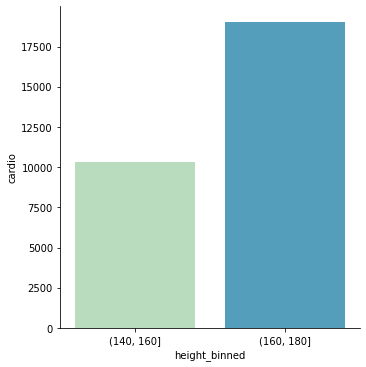

In [58]:
bins = list(np.arange(140,200,20))

aux2 = df3[['height','cardio']].groupby('height').sum().reset_index()

aux2['height_binned'] = pd.cut(aux2['height'], bins=bins)

aux2 = aux2[['height_binned','cardio']].groupby('height_binned').sum().reset_index()
rcParams['figure.figsize'] = 14, 5
sb.catplot(x='height_binned', y='cardio', data=aux2, palette='GnBu', kind='bar');

We observed in the bivariate analysis that weight and height alone do not have a direct relationship with the target variable. Let's add the weight variable and the height variable and derive another variable called BMI (Body Mass Index) and check if this new variable has any relationship with heart disease.

**Aditional Hypothese**

5 - Can the high BMI influence the onset of heart disease?

**TRUE** Hight BMI influense the onset of heart disease.

In [59]:
df3['bmi'] = round((df3['weight'] / pow(df3['height'],2)) * 10000,2) 

In [60]:
df3['bmi_categorized'] = df3.apply(mass, axis=1)

In [61]:
df3.sample()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_categorized
46393,55,1,160.0,53.0,150,80,1,1,0,0,1,1,20.7,Normal weight


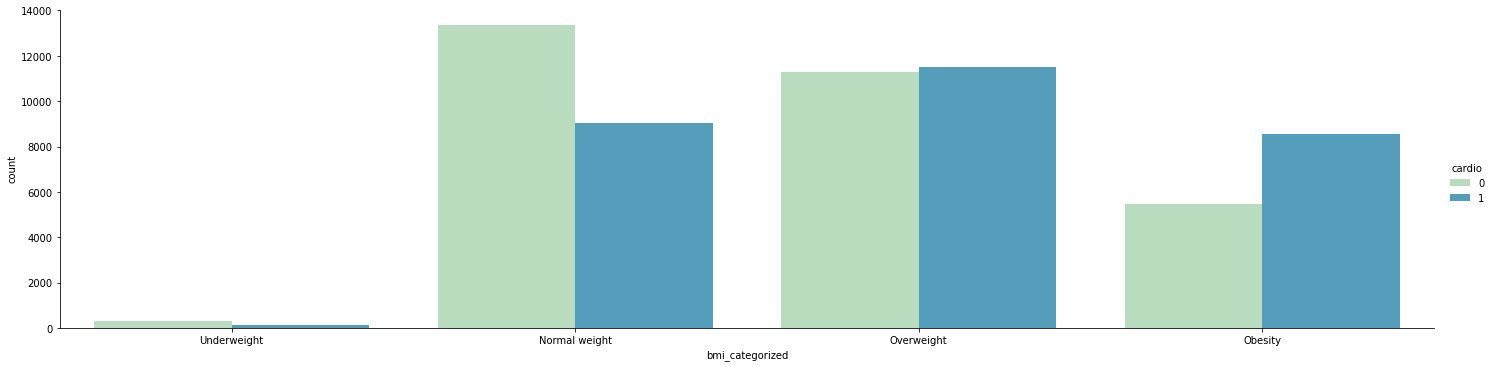

In [62]:
rcParams['figure.figsize'] = 8, 55
sb.factorplot('bmi_categorized', data=df3, kind='count', aspect=4.0,hue='cardio', palette='GnBu', order=['Underweight', 'Normal weight', 'Overweight', 'Obesity']);

#### 3.0.2.1.2 - Exams Hypotheses

1 - High cholesterol patients are more likely to have heart disease?

**TRUE:** Apparently cardio disease occurs in patients with well above and above normal cholesterol.

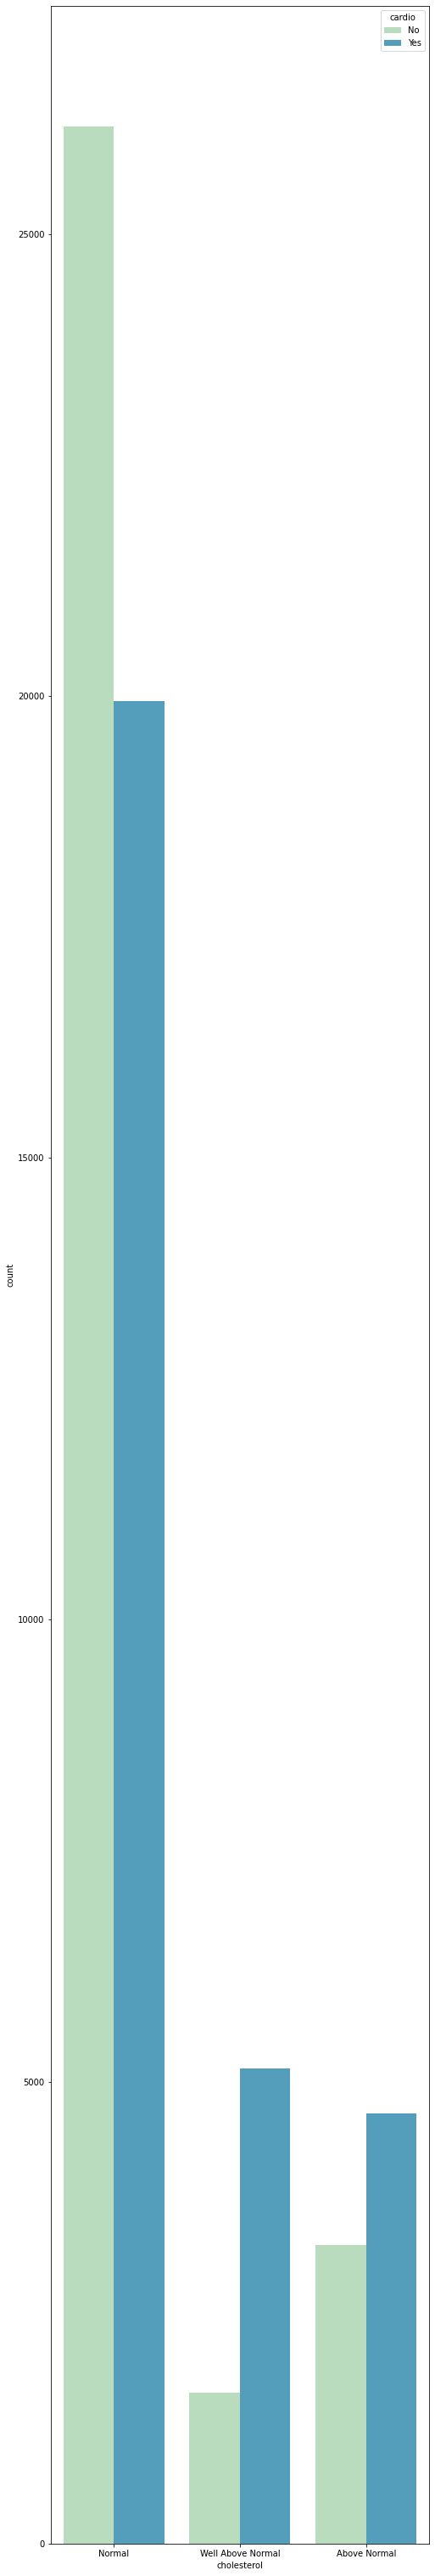

In [63]:
sb.countplot(x='cholesterol', hue='cardio',data=aux, palette='GnBu');

2 - Does blood pressure increase the risk of heart disease?

**TRUE** Starting high blood pressure STAGE 2 

In [64]:
df3['blood_category'] = df3.apply(categorize_blood_pressure, axis=1)

In [65]:
df3.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_categorized,blood_category
0,50,2,168.0,62.0,110,80,1,1,0,0,1,0,21.97,Normal weight,High Blood Pressure(Stage 1)
1,55,1,156.0,85.0,140,90,3,1,0,0,1,1,34.93,Obesity,High Blood Pressure(Stage 2)
2,51,1,165.0,64.0,130,70,3,1,0,0,0,1,23.51,Normal weight,High Blood Pressure(Stage 1)
3,48,2,169.0,82.0,150,100,1,1,0,0,1,1,28.71,Overweight,High Blood Pressure(Stage 2)
5,60,1,151.0,67.0,120,80,2,2,0,0,0,0,29.38,Overweight,High Blood Pressure(Stage 1)


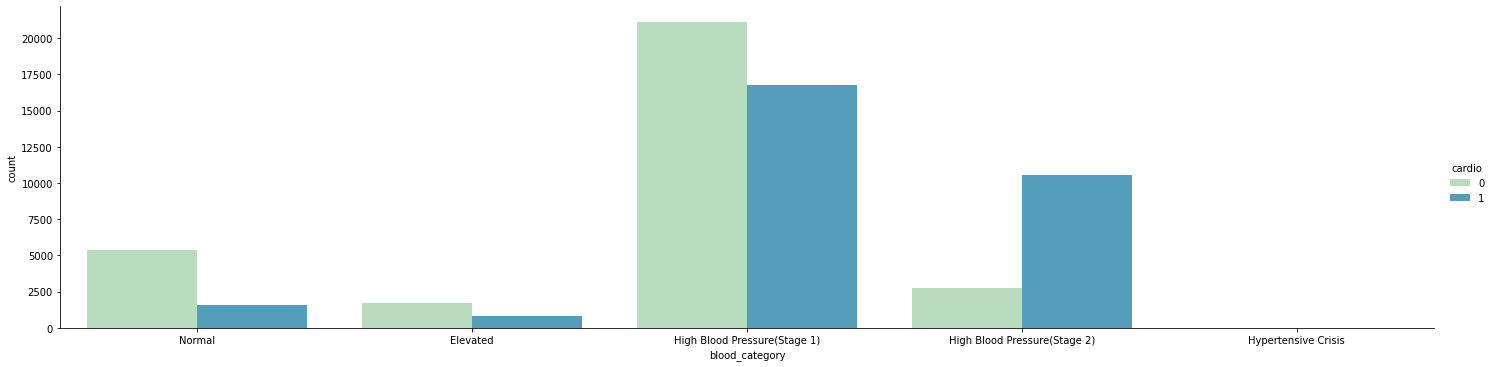

In [66]:
rcParams['figure.figsize'] = 8, 55
sb.factorplot('blood_category', data=df3, kind='count', aspect=4.0,hue='cardio', palette='GnBu', order=['Normal', 'Elevated', 'High Blood Pressure(Stage 1)', 'High Blood Pressure(Stage 2)','Hypertensive Crisis']);

3 - Does the rate of glucose in the blood increase the risk of heart disease?

**TRUE:** Apparently cardio disease occurs in patients with above and well above rate glucose.

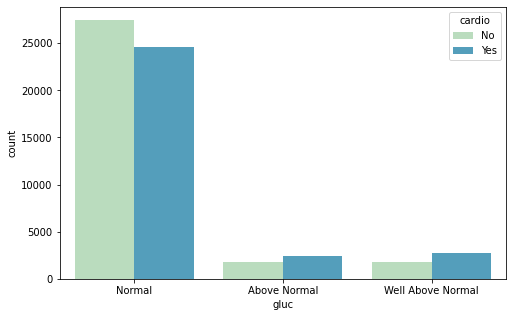

In [67]:
rcParams['figure.figsize'] = 8, 5
sb.countplot(x='gluc', hue='cardio',data=aux, palette='GnBu');

#### 3.0.2.1.3 - Habits Hypotheses

1 - Smokers have more heart disease?

**TRUE:** Smokers are more likely to have heart disease.

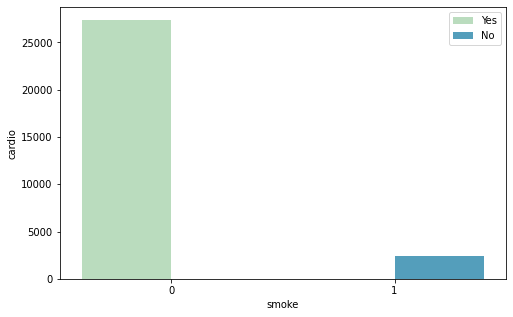

In [68]:
aux1 = df3[['smoke','cardio']].groupby('smoke').sum().reset_index()

rcParams['figure.figsize'] = 8, 5

sb.barplot(x='smoke', y='cardio', data=aux1, hue=['Yes','No'], palette='GnBu');

2 - Who practices physical activities do not develop heart disease?

**TRUE:** Apparently who practice physical activities do not develop heart disease.

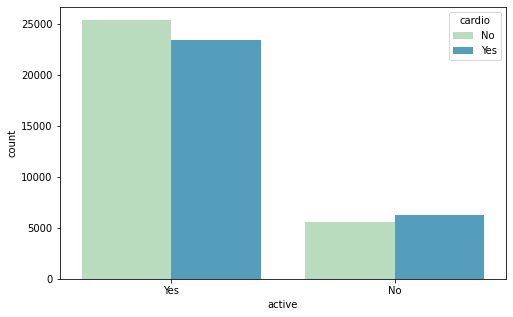

In [69]:
rcParams['figure.figsize'] = 8, 5
sb.countplot(x='active', hue='cardio',data=aux, palette='GnBu');

3 - Does drinking alcohol increase the chances of heart disease?

**TRUE:** Alcohol consumption increases the chances of heart disease.

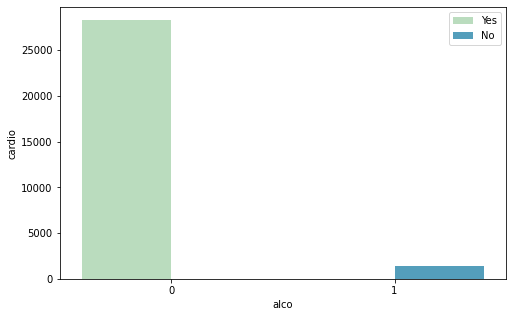

In [70]:
aux2 = df3[['alco','cardio']].groupby('alco').sum().reset_index()

rcParams['figure.figsize'] = 8, 5

sb.barplot(x='alco', y='cardio', data=aux2, hue=['Yes','No'], palette='GnBu');

### 3.0.2.2 - Multivariate Analysis

#### 3.0.2.2.1 - Numerical Features Analysis

In [71]:
correlation = df3[['age','height','weight','ap_hi','ap_lo','bmi']].corr(method='pearson')

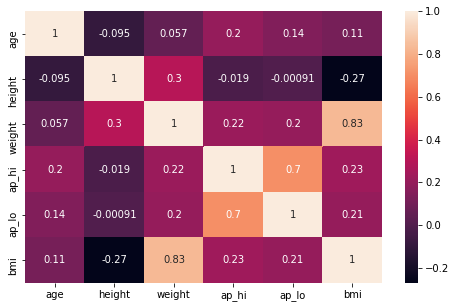

In [72]:
rcParams['figure.figsize'] = 8, 5
sb.heatmap(correlation, annot=True);

#### 3.0.2.2.2 - Categorical Features Analysis

In [73]:
# Categorical data
cat = df3[['gender','cholesterol','gluc','smoke','alco','active','cardio','blood_category','bmi_categorized']]

blood_category_values = {'High Blood Pressure(Stage 1)':0,
                         'High Blood Pressure(Stage 2)':1,
                         'Normal':2,
                         'Elevated':3}

bmi_categorized_values = {'Overweight':0,
                          'Normal weight':1,
                          'Obesity':2,
                          'Underweight':3}

cat = cat.replace({'blood_category': blood_category_values, 
                   'bmi_categorized': bmi_categorized_values,})

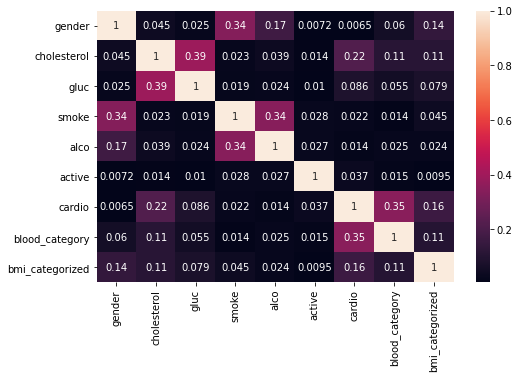

In [74]:
# Calculate cramer V

cat1 = cramer_v(cat['gender'], cat['gender'])
cat2 = cramer_v(cat['gender'], cat['cholesterol'])
cat3 = cramer_v(cat['gender'], cat['gluc'])
cat4 = cramer_v(cat['gender'], cat['smoke'])
cat5 = cramer_v(cat['gender'], cat['alco'])
cat6 = cramer_v(cat['gender'], cat['active'])
cat7 = cramer_v(cat['gender'], cat['cardio'])
cat8 = cramer_v(cat['gender'], cat['blood_category'])
cat9 = cramer_v(cat['gender'], cat['bmi_categorized'])

cat10 = cramer_v(cat['cholesterol'], cat['gender'])
cat11 = cramer_v(cat['cholesterol'], cat['cholesterol'])
cat12 = cramer_v(cat['cholesterol'], cat['gluc'])
cat13 = cramer_v(cat['cholesterol'], cat['smoke'])
cat14 = cramer_v(cat['cholesterol'], cat['alco'])
cat15 = cramer_v(cat['cholesterol'], cat['active'])
cat16 = cramer_v(cat['cholesterol'], cat['cardio'])
cat17 = cramer_v(cat['cholesterol'], cat['blood_category'])
cat18 = cramer_v(cat['cholesterol'], cat['bmi_categorized'])

cat19 = cramer_v(cat['gluc'], cat['gender'])
cat20 = cramer_v(cat['gluc'], cat['cholesterol'])
cat21 = cramer_v(cat['gluc'], cat['gluc'])
cat22 = cramer_v(cat['gluc'], cat['smoke'])
cat23 = cramer_v(cat['gluc'], cat['alco'])
cat24 = cramer_v(cat['gluc'], cat['active'])
cat25 = cramer_v(cat['gluc'], cat['cardio'])
cat26 = cramer_v(cat['gluc'], cat['blood_category'])
cat27 = cramer_v(cat['gluc'], cat['bmi_categorized'])

cat28 = cramer_v(cat['smoke'], cat['gender'])
cat29 = cramer_v(cat['smoke'], cat['cholesterol'])
cat30 = cramer_v(cat['smoke'], cat['gluc'])
cat31 = cramer_v(cat['smoke'], cat['smoke'])
cat32 = cramer_v(cat['smoke'], cat['alco'])
cat33 = cramer_v(cat['smoke'], cat['active'])
cat34 = cramer_v(cat['smoke'], cat['cardio'])
cat35 = cramer_v(cat['smoke'], cat['blood_category'])
cat36 = cramer_v(cat['smoke'], cat['bmi_categorized'])

cat37 = cramer_v(cat['alco'], cat['gender'])
cat38 = cramer_v(cat['alco'], cat['cholesterol'])
cat39 = cramer_v(cat['alco'], cat['gluc'])
cat40 = cramer_v(cat['alco'], cat['smoke'])
cat41 = cramer_v(cat['alco'], cat['alco'])
cat42 = cramer_v(cat['alco'], cat['active'])
cat43 = cramer_v(cat['alco'], cat['cardio'])
cat44 = cramer_v(cat['alco'], cat['blood_category'])
cat45 = cramer_v(cat['alco'], cat['bmi_categorized'])

cat46 = cramer_v(cat['active'], cat['gender'])
cat47 = cramer_v(cat['active'], cat['cholesterol'])
cat48 = cramer_v(cat['active'], cat['gluc'])
cat49 = cramer_v(cat['active'], cat['smoke'])
cat50 = cramer_v(cat['active'], cat['alco'])
cat51 = cramer_v(cat['active'], cat['active'])
cat52 = cramer_v(cat['active'], cat['cardio'])
cat53 = cramer_v(cat['active'], cat['blood_category'])
cat54 = cramer_v(cat['active'], cat['bmi_categorized'])

cat55 = cramer_v(cat['cardio'], cat['gender'])
cat56 = cramer_v(cat['cardio'], cat['cholesterol'])
cat57 = cramer_v(cat['cardio'], cat['gluc'])
cat58 = cramer_v(cat['cardio'], cat['smoke'])
cat59 = cramer_v(cat['cardio'], cat['alco'])
cat60 = cramer_v(cat['cardio'], cat['active'])
cat61 = cramer_v(cat['cardio'], cat['cardio'])
cat62 = cramer_v(cat['cardio'], cat['blood_category'])
cat63 = cramer_v(cat['cardio'], cat['bmi_categorized'])

cat64 = cramer_v(cat['blood_category'], cat['gender'])
cat65 = cramer_v(cat['blood_category'], cat['cholesterol'])
cat66 = cramer_v(cat['blood_category'], cat['gluc'])
cat67 = cramer_v(cat['blood_category'], cat['smoke'])
cat68 = cramer_v(cat['blood_category'], cat['alco'])
cat69 = cramer_v(cat['blood_category'], cat['active'])
cat70 = cramer_v(cat['blood_category'], cat['cardio'])
cat71 = cramer_v(cat['blood_category'], cat['blood_category'])
cat72 = cramer_v(cat['blood_category'], cat['bmi_categorized'])

cat73 = cramer_v(cat['bmi_categorized'], cat['gender'])
cat74 = cramer_v(cat['bmi_categorized'], cat['cholesterol'])
cat75 = cramer_v(cat['bmi_categorized'], cat['gluc'])
cat76 = cramer_v(cat['bmi_categorized'], cat['smoke'])
cat77 = cramer_v(cat['bmi_categorized'], cat['alco'])
cat78 = cramer_v(cat['bmi_categorized'], cat['active'])
cat79 = cramer_v(cat['bmi_categorized'], cat['cardio'])
cat80 = cramer_v(cat['bmi_categorized'], cat['blood_category'])
cat81 = cramer_v(cat['bmi_categorized'], cat['bmi_categorized'])

# Final dataset
d = pd.DataFrame( {'gender': [cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9], 
                   'cholesterol': [cat10, cat11, cat12, cat13, cat14, cat15, cat16, cat17, cat18],
                   'gluc': [cat19, cat20, cat21, cat22, cat23, cat24, cat25, cat26, cat27],
                   'smoke': [cat28, cat29, cat30, cat31, cat32, cat33, cat34, cat35, cat36],
                   'alco': [cat37, cat38, cat39, cat40, cat41, cat42, cat43, cat44, cat45] ,
                   'active': [cat46, cat47, cat48, cat49, cat50, cat51, cat52, cat53,cat54],
                   'cardio': [cat55, cat56, cat57, cat58, cat59, cat60, cat61, cat62, cat63],
                   'blood_category': [cat64, cat65, cat66, cat67, cat68, cat69, cat70, cat71, cat72],
                   'bmi_categorized': [cat73, cat74, cat75, cat76, cat77, cat78, cat79, cat80, cat81]})
d = d.set_index(d.columns)

sb.heatmap(d, annot=True);

# 4.0 - DATA PREPARATION

In [75]:
df4 = df3.copy()

<AxesSubplot:xlabel='bmi'>

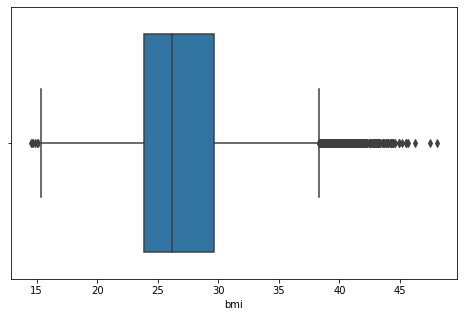

In [76]:
sb.boxplot(df4.bmi)

before I will check the new feature created called **bmi**

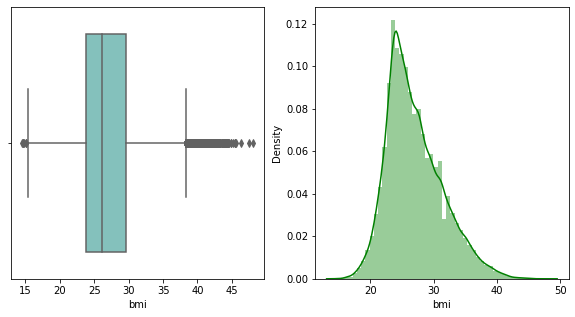

In [77]:
plt.rcParams['figure.figsize'] = (10,5);

plt.subplot(1,2,1)
sb.boxplot(df4.bmi, palette="GnBu");

plt.subplot(1,2,2)
sb.distplot(df4.bmi, color='g');

Removing Outliers

In [78]:
Q1_bmi = df4.bmi.quantile(.25)
Q3_bmi = df4.bmi.quantile(.75) 

IQR_bmi = Q3_bmi - Q1_bmi

lower_limit_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_limit_bmi = Q3_bmi + 1.5 * IQR_bmi

df4.bmi[(df4.bmi < lower_limit_bmi) | (df4.bmi > upper_limit_bmi)] 

df4 = df4[(df4.bmi > lower_limit_bmi) & (df4.bmi < upper_limit_bmi)]

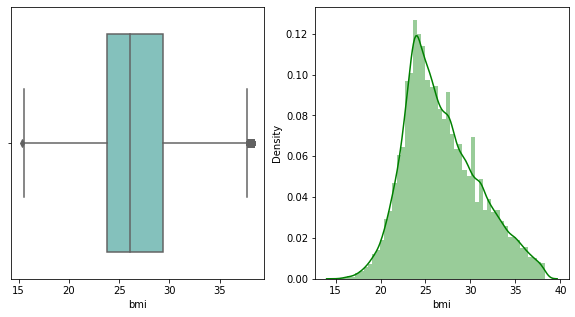

In [79]:
plt.rcParams['figure.figsize'] = (10,5);

plt.subplot(1,2,1)
sb.boxplot(df4.bmi, palette="GnBu");

plt.subplot(1,2,2)
sb.distplot(df4.bmi, color='g');

One more step !

In [80]:
Q1_bmi = df4.bmi.quantile(.25)
Q3_bmi = df4.bmi.quantile(.75) 

IQR_bmi = Q3_bmi - Q1_bmi

lower_limit_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_limit_bmi = Q3_bmi + 1.5 * IQR_bmi

df4.bmi[(df4.bmi < lower_limit_bmi) | (df4.bmi > upper_limit_bmi)] 

df4 = df4[(df4.bmi > lower_limit_bmi) & (df4.bmi < upper_limit_bmi)]

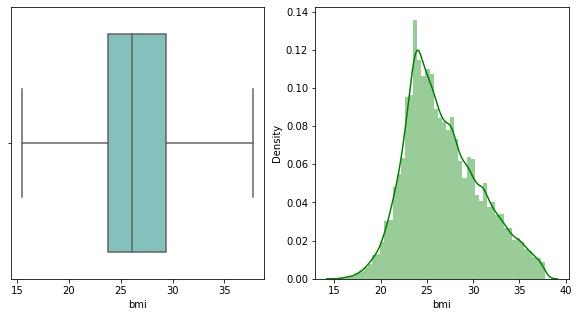

In [81]:
plt.rcParams['figure.figsize'] = (10,5);

plt.subplot(1,2,1)
sb.boxplot(df4.bmi, palette="GnBu");

plt.subplot(1,2,2)
sb.distplot(df4.bmi, color='g');

In [82]:
df4.shape

(59607, 15)

## 4.0.1 - Normalization Numerical Features

If you look at numerical variables, they are already on the same scale, so there is no need to normalize.

## 4.0.2 - Encoding Categorical Features

ORDINAL ENCODING

 - **bmi_categorized**

In [87]:
bmi_categorized_dict = {'Underweight':0,
                        'Normal weight':1,
                        'Overweight':2,
                        'Obesity':3}
df4['bmi_categorized'] = df4['bmi_categorized'].map(bmi_categorized_dict)

 - **blood_category**

In [90]:
blood_category_dict = {'Normal':0,
                        'Elevated':1,
                        'High Blood Pressure(Stage 1)':2,
                        'High Blood Pressure(Stage 2)':3}
df4['blood_category'] = df4['blood_category'].map(blood_category_dict)

In [91]:
df4.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_categorized,blood_category
0,50,2,168.0,62.0,110,80,1,1,0,0,1,0,21.97,1.0,2
1,55,1,156.0,85.0,140,90,3,1,0,0,1,1,34.93,3.0,3
2,51,1,165.0,64.0,130,70,3,1,0,0,0,1,23.51,1.0,2
3,48,2,169.0,82.0,150,100,1,1,0,0,1,1,28.71,2.0,3
5,60,1,151.0,67.0,120,80,2,2,0,0,0,0,29.38,2.0,2


# 5.0 - FEATURE SELECTION

In [112]:
df5 = df4.copy()

## 5.0.1 - Removing features

In [113]:
df5 = df5.drop(columns='bmi_categorized')

## 5.0.2 - Separating predictor variables from target variable

In [114]:
x = df5.drop(columns='cardio')
y = df5.cardio

In [109]:
x.shape , y.shape

((59607, 13), (59607,))

## 5.0.3 - Spliting Dataframe into trainning and test dataset

In [115]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y)

In [116]:
xTrain.shape , yTrain.shape

((44705, 13), (44705,))

In [117]:
xTest. shape, yTest.shape

((14902, 13), (14902,))

## 5.0.4 - Selecting features with RandomForestClassifier

### 5.0.4.1 - Instantiating the RandomForestClassifier algorithm

In [118]:
rfc = RandomForestClassifier()

### 5.0.4.2 - Selectiong features

In [120]:
rfc.fit(xTrain, yTrain)

RandomForestClassifier(n_estimators=50,
                       random_state=RandomState(MT19937) at 0x1140F6740)

In [122]:
features = x.columns

In [123]:
for feature in zip(features, rfc.feature_importances_):
    print(feature)

('age', 0.1724849216060375)
('gender', 0.019625518787904125)
('height', 0.13770111974446334)
('weight', 0.14148699311330717)
('ap_hi', 0.12523893427222704)
('ap_lo', 0.06502537483644269)
('cholesterol', 0.041923895742417)
('gluc', 0.018836446226525506)
('smoke', 0.010490226860627885)
('alco', 0.007747320838869015)
('active', 0.015349964629600683)
('bmi', 0.1923774916355037)
('blood_category', 0.051711791706074574)


# 6.0 - MACHINE LEARNING MODEL

In [124]:
df6 = df5.copy()

## 6.0.1 - Removing columns

In [131]:
x = x.drop(columns=['gender','cholesterol','gluc','smoke','alco','active','blood_category'])

In [132]:
x.head()

,age,height,weight,ap_hi,ap_lo,bmi
0,50,168.0,62.0,110,80,21.97
1,55,156.0,85.0,140,90,34.93
2,51,165.0,64.0,130,70,23.51
3,48,169.0,82.0,150,100,28.71
5,60,151.0,67.0,120,80,29.38


## 6.0.2 - Spliting Dataframe into trainning and test dataset

In [145]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x,y)

In [146]:
x_Train.shape , y_Train.shape

((44705, 6), (44705,))

In [147]:
x_Test.shape , y_Test.shape

((14902, 6), (14902,))

## 6.0.3 - Base model - Gaussian Naive Bayes

In [148]:
nbc = GaussianNB()

In [150]:
prediction = nbc.fit(x_Train, y_Train).predict(x_Test)

In [154]:
print(pd.crosstab(y_Test, prediction, rownames=['Real'], colnames=['Predito'], margins=True), ' ')

Predito     0     1    All
Real                      
0        6154  1460   7614
1        3018  4270   7288
All      9172  5730  14902  


In [155]:
print(metrics.classification_report(y_Test, prediction)) 

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      7614
           1       0.75      0.59      0.66      7288

    accuracy                           0.70     14902
   macro avg       0.71      0.70      0.69     14902
weighted avg       0.71      0.70      0.70     14902

